# Intermediate Assignment 4: Introduction to Regression

This assignment uses the variables listed below.

- GROCPTH16 - Count of grocery stores per 1,000 people, 2016
- PCT_LACCESS_POP15 - Percent of households with low access to grocery stores, 2015
- FFRPTH16 - Count of fast food restaurants per 1,000 people, 2016
- MEDHHINC15 - Median household income, 2015
- RECFACPTH16 - Count of recreational facilities per 1,000 people, 2016
- PCT_DIABETES_ADULTS13 - Adult diabetes rate, 2013
- METRO13 - Metro/nonmetro classification, 2013
- Pop2020 - Census populations on the county level, 2020
- Pop2020 is optional as it comes from the Census API, but is provided as part of the dataset on Teams.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# import dataset, subset to variable list
full_data = pd.read_csv(r"C:\Users\JohnTaylor\DSTP_Assignments\Data\Food Environment Atlas with Population 2020.csv")
analysis_col = ['GROCPTH16', 'PCT_LACCESS_POP15', 'FFRPTH16', 'MEDHHINC15', 'RECFACPTH16', 'PCT_DIABETES_ADULTS13', 'METRO13', 'Pop2020']
data = full_data[analysis_col]
data.head()

,GROCPTH16,PCT_LACCESS_POP15,FFRPTH16,MEDHHINC15,RECFACPTH16,PCT_DIABETES_ADULTS13,METRO13,Pop2020
0,0.054271,32.062255,0.795977,56580.0,0.108542,13.0,1.0,58805.0
1,0.139753,16.767489,0.751775,52387.0,0.101200,10.4,1.0,231767.0
2,0.155195,22.105560,0.892372,31433.0,0.000000,18.4,0.0,25223.0
3,0.220916,4.230324,0.309283,40767.0,0.044183,14.8,1.0,22293.0
4,0.086863,6.497380,0.399569,50487.0,0.069490,14.1,1.0,59134.0


## Part A: Explore Correlations

**2 - Create histograms of each variable. Do any have skewed distributions? If so, transform them so you are able to detect a stronger correlation (a stronger linear relationship). Examples of transformations can be to standardize, take the log, or take the square root.**

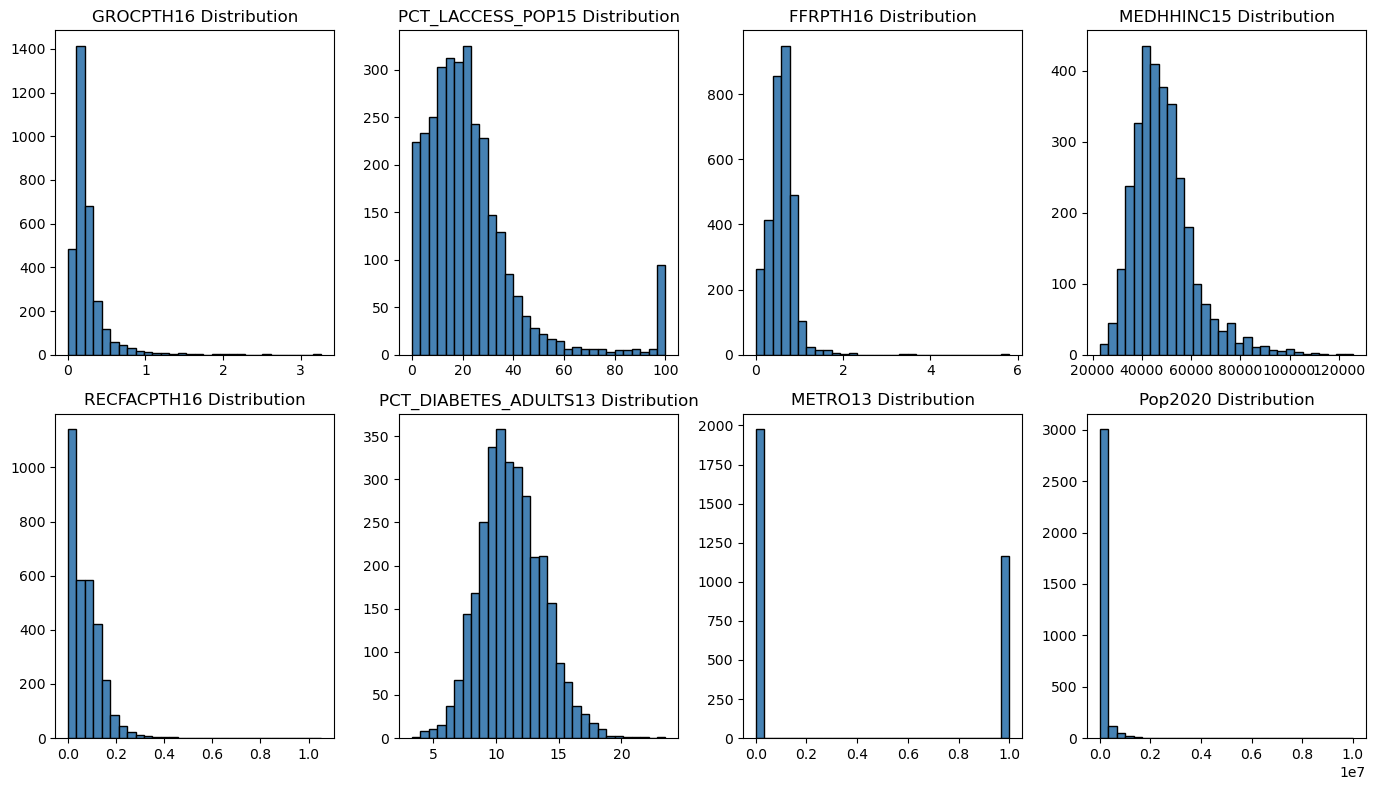

In [3]:
# create figure with 7 axes
%matplotlib inline
fig, axes = plt.subplots(2, 4, figsize = (14,8))
axes = axes.flatten()
i = 0
for ax in range(len(axes)):
    axes[i].hist(data[analysis_col[i]], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{analysis_col[i]} Distribution')
    i += 1

plt.tight_layout()
plt.show()

Skewed distributions:
- GROCPTH16 is extremely right-tailed
- PCT_LACCESS_POP15 is also right-tailed, but with an increase at the right limit
- FFRPTCH16 is also very right-tailed
- MEDHHINC15, also right-tailed but not as severe as the others
- RECFACPTH16 shows exponential decay
- PCT_DIABETES_ADULTS13 is normal :)
- METRO13 is Boolean
- Pop2020 shows exponential decay

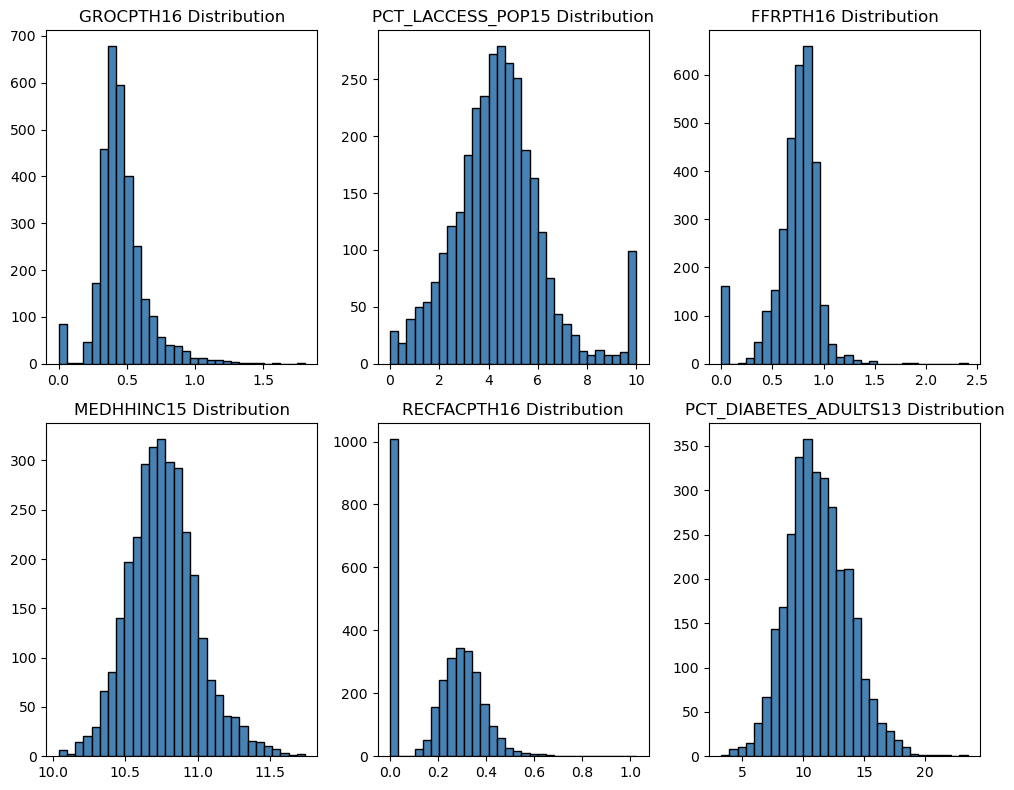

In [29]:
# transform distributions using standardization, log, or sqrt to enhance correlation
data_norm = data.copy()
data_norm['GROCPTH16'] = list(np.sqrt(data_norm['GROCPTH16']))
data_norm['PCT_LACCESS_POP15'] = list(np.sqrt(data_norm['PCT_LACCESS_POP15']))
data_norm['FFRPTH16'] = list(np.sqrt(data_norm['FFRPTH16']))
data_norm['MEDHHINC15'] = list(np.log(data_norm['MEDHHINC15']))
data_norm['RECFACPTH16'] = list(np.sqrt(data_norm['RECFACPTH16']))

# re-plot histograms to show changes
fig, axes = plt.subplots(2, 3, figsize = (10,8))
axes = axes.flatten()
trans_col = analysis_col[:-2] # drop pop2020 and metro13 (boolean)
i = 0
for ax in range(len(axes)):
    axes[i].hist(data_norm[trans_col[i]], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{trans_col[i]} Distribution')
    i += 1

plt.tight_layout()
plt.show()

**3 - Create a correlation matrix with the variables. Which are more coorelated with each other? Are they positive or negative? Interpret results, describe expectations and surprises.**

                       GROCPTH16  PCT_LACCESS_POP15  ...   METRO13   Pop2020
GROCPTH16               1.000000           0.148124  ... -0.248262 -0.047403
PCT_LACCESS_POP15       0.148124           1.000000  ... -0.044497 -0.035703
FFRPTH16               -0.096962          -0.163608  ...  0.170277  0.164214
MEDHHINC15             -0.054811           0.099827  ...  0.400640  0.238913
RECFACPTH16            -0.142422          -0.085591  ...  0.287854  0.198060
PCT_DIABETES_ADULTS13  -0.089584          -0.173346  ... -0.143794 -0.171933
METRO13                -0.248262          -0.044497  ...  1.000000  0.318633
Pop2020                -0.047403          -0.035703  ...  0.318633  1.000000

[8 rows x 8 columns]


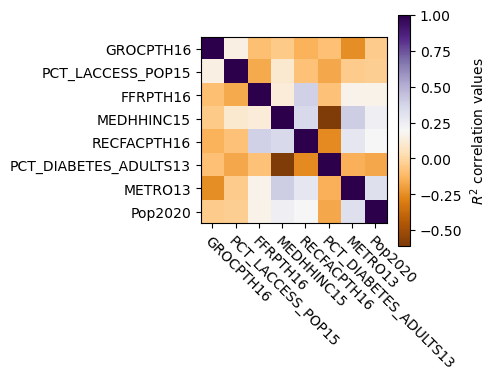

In [5]:
correlation_matrix = data_norm.corr()
print(correlation_matrix)

plt.figure(figsize=(3,3))
plt.imshow(correlation_matrix, cmap='PuOr')
plt.colorbar(label='$R^2$ correlation values')
plt.xticks(range(8), data_norm[analysis_col], rotation=-45, ha="left", rotation_mode="anchor")
plt.yticks(range(8), data_norm[analysis_col])
plt.show()

There appears to be a strongly negative correlation between the adult diabetes rate (PCT_DIABETES_ADULTS13) and median household income (MEDHHINC15), which isn't likely to be a genuine correlation. If the diabetes statistic was split into types, maybe some correlations between healthier diets, diabetes type 2, and median household income could be further investigated. 

**4 - Plot a histogram of PCT_DIABETES_ADULTS13, adding reference lines for national mean and median. What could cause them to differ?**

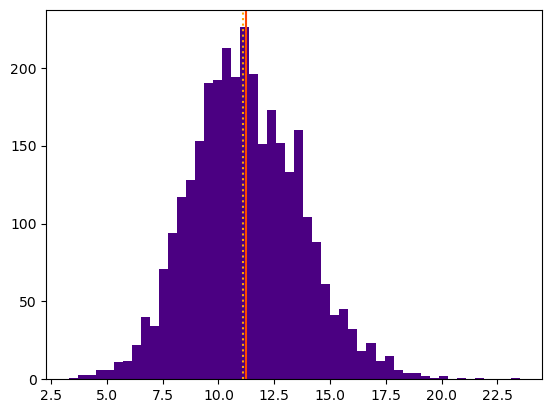

Mean: 11.236123488224063
Median: 11.1


In [6]:
# plot a histogram, add np.mean and np.median reference lines
# remove NaNs for median
plt.hist(data_norm.PCT_DIABETES_ADULTS13, bins=50, color='indigo')
plt.axvline(x=np.mean(data_norm.PCT_DIABETES_ADULTS13), 
            linestyle='solid', color='orangered')
plt.axvline(x=np.median(data_norm.PCT_DIABETES_ADULTS13[~np.isnan(data_norm.PCT_DIABETES_ADULTS13)]), 
            linestyle='dotted', color='orange')
plt.show()

print(f'Mean: {np.mean(data_norm.PCT_DIABETES_ADULTS13)}')
print(f'Median: {np.median(data_norm.PCT_DIABETES_ADULTS13[~np.isnan(data_norm.PCT_DIABETES_ADULTS13)])}')

The distribution shown in the histogram is not completely normal. The data is skewed slightly to the left, which causes the median to be lower than the mean.

## Part B - Exploring Predictors of Diabetes Rates

**1 - Take PCT_DIABETES_ADULTS13 and choose one other variable to do the below analysis.**
- I will do the analysis with RECFACPTH16 (recreational facilities per 1000 people)

In [10]:
y = data_norm.PCT_DIABETES_ADULTS13
x = data_norm.RECFACPTH16
correlation = x.corr(y)

**2 - Create a scatterplot with a text annotation that displays the correlation coefficient**

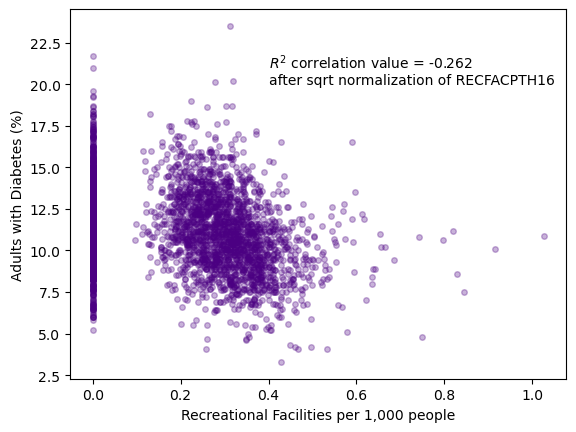

In [18]:
plt.plot(x, y, 'o', markersize=4, color='indigo', alpha=0.3)
plt.ylabel('Adults with Diabetes (%)')
plt.xlabel('Recreational Facilities per 1,000 people')
plt.annotate(f'$R^2$ correlation value = {round(correlation, 3)}\nafter sqrt normalization of RECFACPTH16', xy=(0.4, 20))

plt.show()

**3 - Run a regression using the two variables, using % diabetes rate as the response variable.**

In [14]:
data_noNaN = data_norm.dropna()
model = sm.OLS(data_noNaN.PCT_DIABETES_ADULTS13, sm.add_constant(data_noNaN.RECFACPTH16)).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                   Adj. R-squared:     0.067     
Dependent Variable: PCT_DIABETES_ADULTS13 AIC:                14305.5944
Date:               2025-04-15 09:36      BIC:                14317.6849
No. Observations:   3119                  Log-Likelihood:     -7150.8   
Df Model:           1                     F-statistic:        225.6     
Df Residuals:       3117                  Prob (F-statistic): 2.74e-49  
R-squared:          0.067                 Scale:              5.7436    
--------------------------------------------------------------------------
                 Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------------
const           12.0653     0.0702   171.9863   0.0000   11.9278   12.2029
RECFACPTH16     -3.9717     0.2644   -15.0207   0.0000   -4.4902   -3.4533
------------------------------------------------------------------------
Omnibus:                 54.818         Durbin-Watson:            0.914 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         61.273
Skew:                    0.283          Prob(JB):                 0.000 
Kurtosis:                3.388          Condition No.:            6     
========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

**4 - Create a new scatterplot that displays the regression line and its equation.**

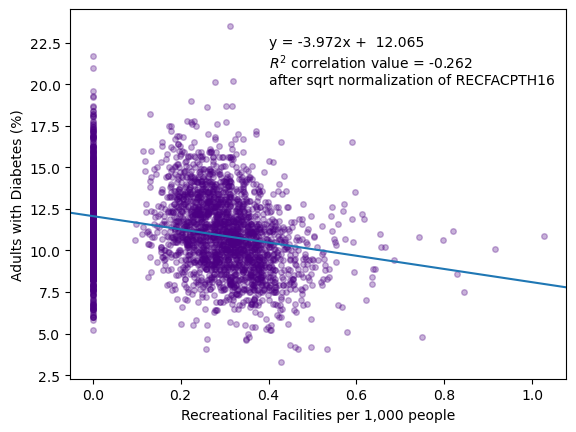

In [19]:
b, m = model.params
x = data_noNaN.RECFACPTH16
y = data_noNaN.PCT_DIABETES_ADULTS13

plt.plot(x, y, 'o', markersize=4, color='indigo', alpha=0.3)
plt.ylabel('Adults with Diabetes (%)')
plt.xlabel('Recreational Facilities per 1,000 people')

# add regression line
plt.axline(xy1=(np.min(x), m*np.min(x)+b), slope=m)

# add regression equation
plt.annotate(f'y = {m : .3f}x + {b : .3f}\n$R^2$ correlation value = {correlation : .3f}\nafter sqrt normalization of RECFACPTH16', xy=(0.4, 20))

plt.show()

**5 - How does this regression satisfy or not satisfy the 5 assumptions of linear regression?**

*1) Linearity*

Within the context of this regression, linearity would assume that fewer recreational facilities per 1,000 people is related to higher incidence of diabetes. There is a large range of % of adults with diabetes where there are no recreational facilities, indicating that other variables may be more significant contributers to diabetes rates in adults. 

*2) Independence*

Yes, we can assume that the observations are independent of each other.

*3) Homoscedasticity*

The variance of residuals are constant across the study levels. This is shown by the flat regression line in the upper right plot below.

*4) Normality*

The distribution of RECFACPTH16 is not normal. The data was sqrt transformed, but the transformation did not remove the high occurance of meaningful '0' values within the dataset.(Note - I tried to transform with log instead of sqrt for exponential decay, but log(0) is undefined)

*5) Independent Outcomes*

Does not apply.



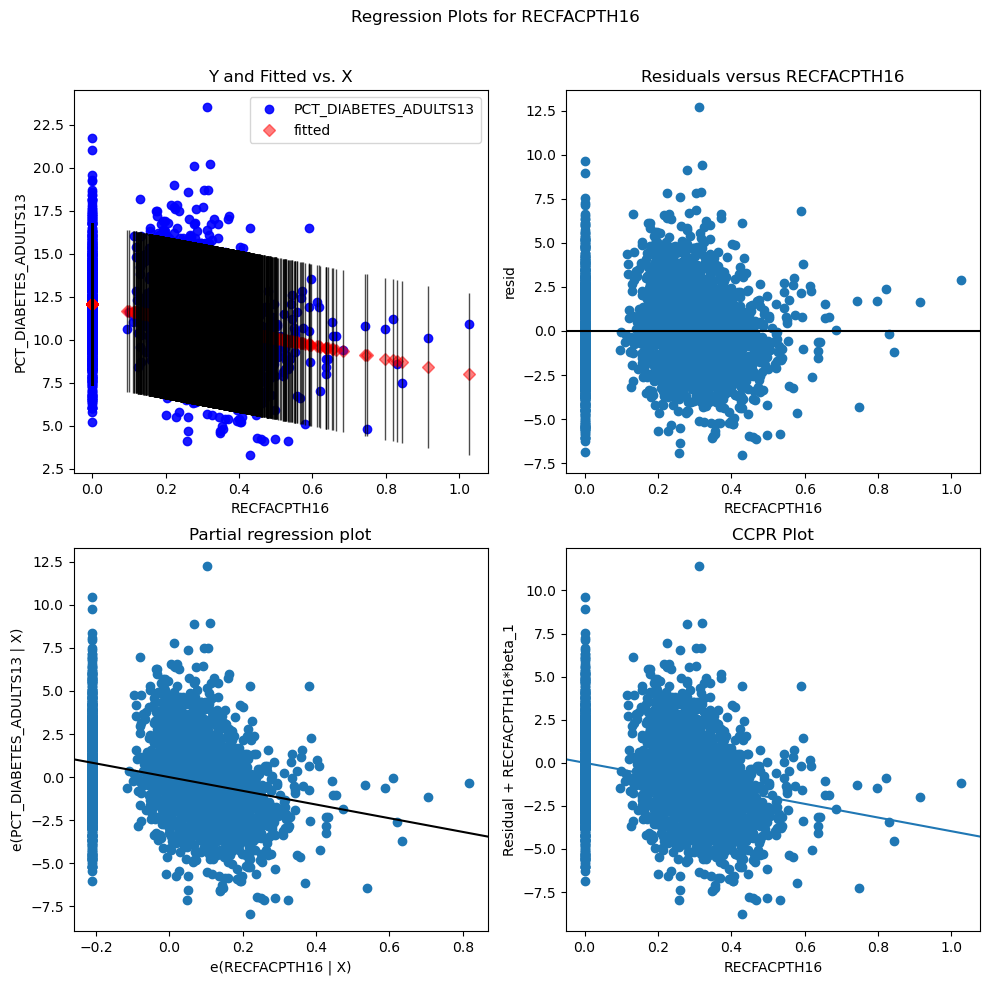

In [20]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(model, 'RECFACPTH16', fig=fig)

plt.show()

**6 - Add METRO13 to the regression model as a categorical predictor variable. Interpret results.**

In [31]:
model_withmetro = sm.OLS(data_noNaN['PCT_DIABETES_ADULTS13'], 
                   sm.add_constant(data_noNaN[['RECFACPTH16', 'METRO13']])).fit()
model_withmetro.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                   Adj. R-squared:     0.072     
Dependent Variable: PCT_DIABETES_ADULTS13 AIC:                14290.0623
Date:               2025-04-15 11:34      BIC:                14308.1981
No. Observations:   3119                  Log-Likelihood:     -7142.0   
Df Model:           2                     F-statistic:        122.2     
Df Residuals:       3116                  Prob (F-statistic): 8.14e-52  
R-squared:          0.073                 Scale:              5.7132    
--------------------------------------------------------------------------
                 Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------------
const           12.1395     0.0722   168.2002   0.0000   11.9980   12.2810
RECFACPTH16     -3.6396     0.2754   -13.2171   0.0000   -4.1795   -3.0997
METRO13         -0.3877     0.0925    -4.1910   0.0000   -0.5690   -0.2063
------------------------------------------------------------------------
Omnibus:                 51.264         Durbin-Watson:            0.882 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         58.024
Skew:                    0.266          Prob(JB):                 0.000 
Kurtosis:                3.403          Condition No.:            7     
========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

The introduction of the METRO13 categorical variable slightly improves the model. The R^2 value of the first model was 0.067, and the R^2 of this model is 0.073. Because people who live in a metro area are also likely to have multiple recreational facilities per 1000 residents, the intpretation of the model results remains mostly unchanged. The coefficient of RECFACPTH16 is similar, and METRO13 also has a negative coefficient. 

**7 - Add more variables to the regression model. What are the potential confounders? Are there other variables that may influence the outcome independently?**

In [32]:
model_large = sm.OLS(data_noNaN['PCT_DIABETES_ADULTS13'], 
                   sm.add_constant(data_noNaN[['RECFACPTH16', 'METRO13', 'MEDHHINC15','PCT_LACCESS_POP15']])).fit()
model_large.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                   Adj. R-squared:     0.399     
Dependent Variable: PCT_DIABETES_ADULTS13 AIC:                12936.7535
Date:               2025-04-15 11:49      BIC:                12966.9799
No. Observations:   3119                  Log-Likelihood:     -6463.4   
Df Model:           4                     F-statistic:        518.8     
Df Residuals:       3114                  Prob (F-statistic): 0.00      
R-squared:          0.400                 Scale:              3.6997    
-------------------------------------------------------------------------
                     Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------------
const               81.4568    1.7640   46.1767  0.0000  77.9981  84.9156
RECFACPTH16         -1.3888    0.2315   -6.0005  0.0000  -1.8426  -0.9350
METRO13              0.6340    0.0792    8.0086  0.0000   0.4788   0.7892
MEDHHINC15          -6.4569    0.1670  -38.6649  0.0000  -6.7843  -6.1295
PCT_LACCESS_POP15   -0.1533    0.0188   -8.1533  0.0000  -0.1902  -0.1164
------------------------------------------------------------------------
Omnibus:                 39.199         Durbin-Watson:            1.214 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         61.344
Skew:                    -0.107         Prob(JB):                 0.000 
Kurtosis:                3.653          Condition No.:            603   
========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

The variable with the highest coefficient is median household income. Potential confounders could include grocery stores per 1000 people and % of houses with low access to grocery stores, as they are measuring similar things and could distort relationships between access to healthy food and diabetes incidence rates. 